# Bike Sharing - Assignment

**Problem Statement:**
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data (EDA)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

print(f'numpy version: {np.__version__}')
print(f'pandas version: {pd.__version__}')
print(f'matplotlib version: {matplotlib.__version__}')
print(f'seaborn version: {sns.__version__}')

numpy version: 1.21.2
pandas version: 1.3.5
matplotlib version: 3.5.0
seaborn version: 0.11.2


In [2]:
# import dataset
bike_df = pd.read_csv('datasets/day.csv', index_col=0)
bike_df.head(15)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822


In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [4]:
# check for empty data
bike_df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# statistics
bike_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

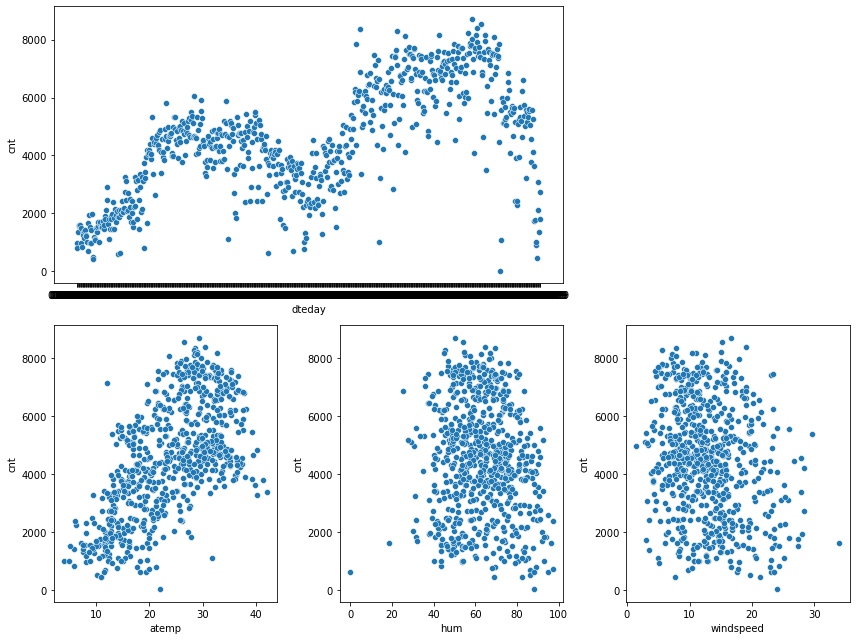

In [6]:
# fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(12,12), tight_layout=True)
fig = plt.figure(figsize=(12,9), tight_layout=True)
gs = GridSpec(2, 3, figure=fig)

sns.scatterplot(data=bike_df, y='cnt', x='dteday', ax=fig.add_subplot(gs[0, :2]))
sns.scatterplot(data=bike_df, y='cnt', x='atemp', ax=fig.add_subplot(gs[1,0]))
sns.scatterplot(data=bike_df, y='cnt', x='hum', ax=fig.add_subplot(gs[1,1]))
sns.scatterplot(data=bike_df, y='cnt', x='windspeed', ax=fig.add_subplot(gs[1,2]))

plt.show()

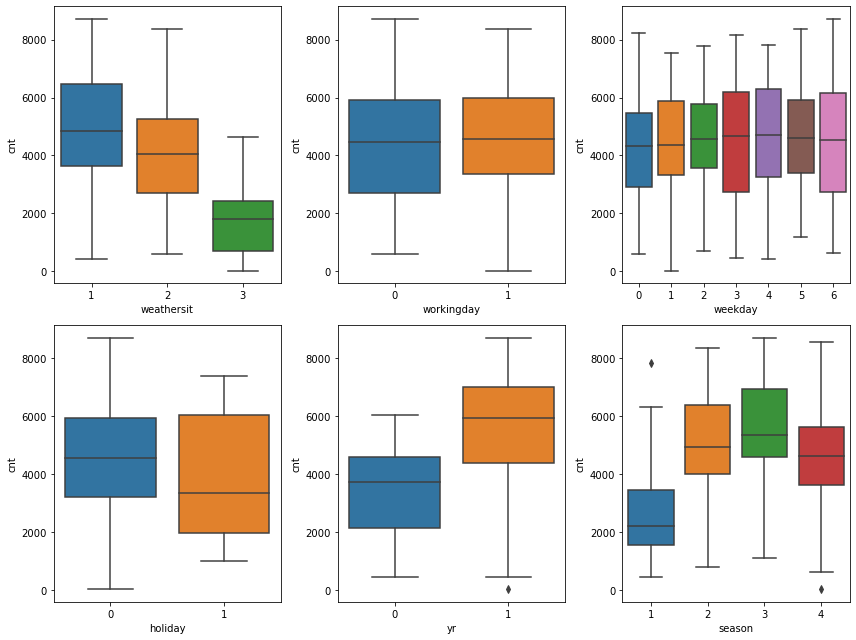

In [7]:
plt.figure(figsize=(12,9))

plt.subplot(2,3,1)
sns.boxplot(data=bike_df, y='cnt', x='weathersit')

plt.subplot(2,3,2)
sns.boxplot(data=bike_df, y='cnt', x='workingday')

plt.subplot(2,3,3)
sns.boxplot(data=bike_df, y='cnt', x='weekday')

plt.subplot(2,3,4)
sns.boxplot(data=bike_df, y='cnt', x='holiday')

plt.subplot(2,3,5)
sns.boxplot(data=bike_df, y='cnt', x='yr')

plt.subplot(2,3,6)
sns.boxplot(data=bike_df, y='cnt', x='season')

plt.tight_layout()

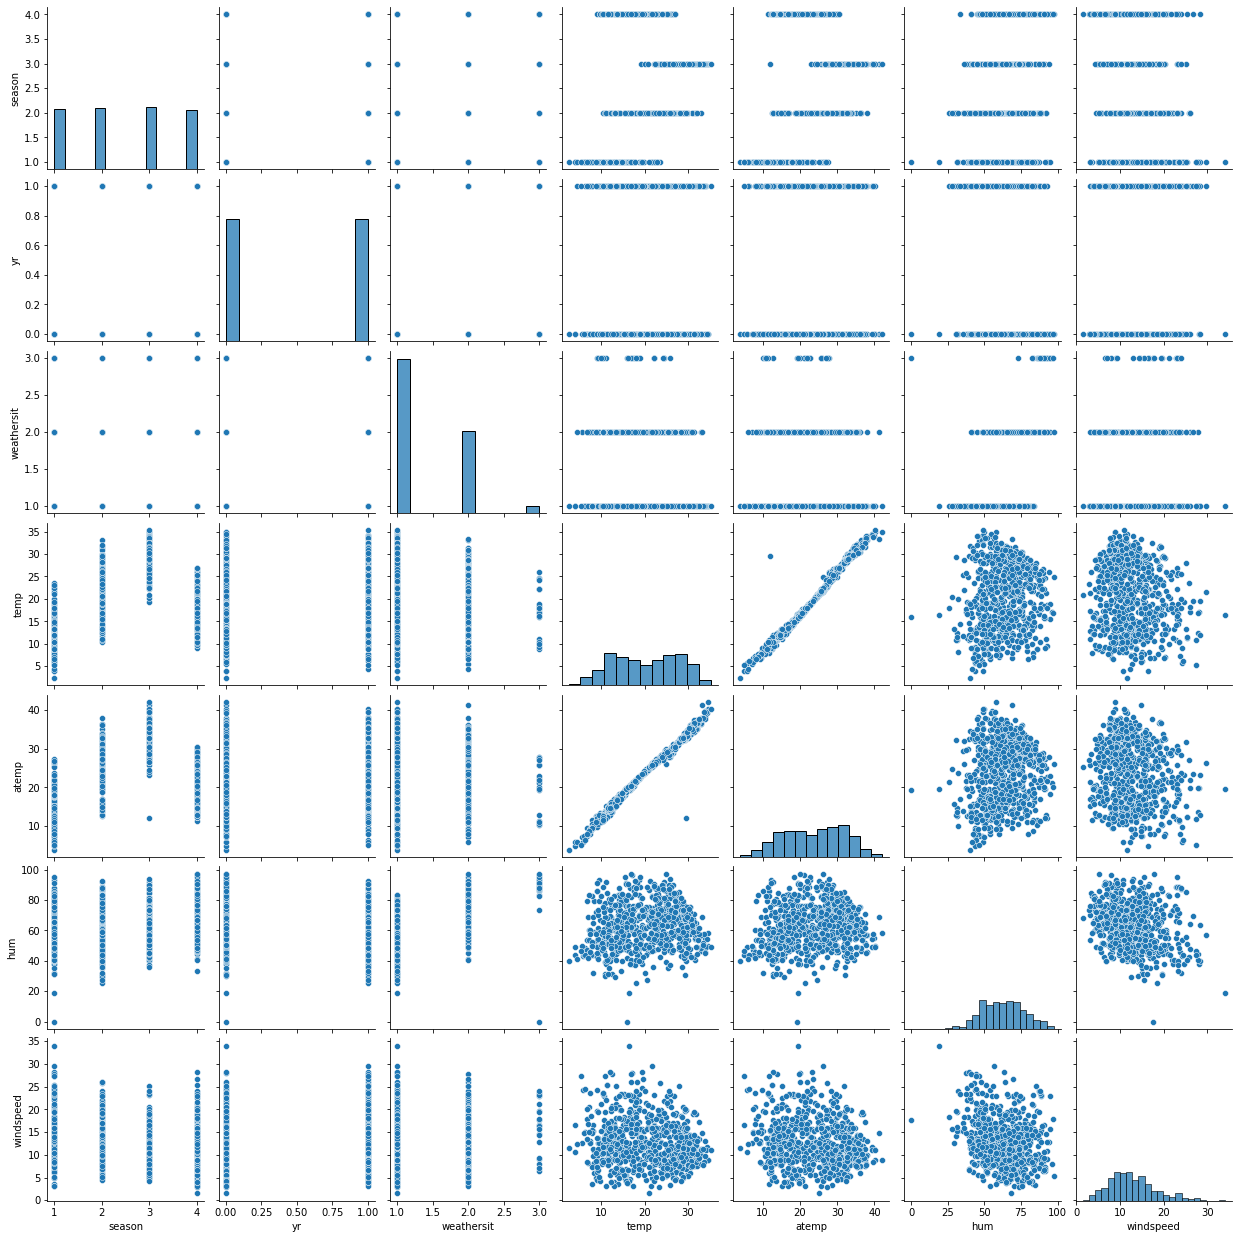

In [8]:
sns.pairplot(bike_df[['season','yr','weathersit','temp','atemp','hum','windspeed']])
plt.show()

## Step 3: Data Preperation

### Columnize Categorical data

#### Seasons

In [9]:
# change seasons to dummy variables

seasons = pd.get_dummies(bike_df['season'], drop_first=True)
seasons.columns=['Summer','Fall','Winter']
print(seasons.head())
print(seasons.tail())

         Summer  Fall  Winter
instant                      
1             0     0       0
2             0     0       0
3             0     0       0
4             0     0       0
5             0     0       0
         Summer  Fall  Winter
instant                      
726           0     0       0
727           0     0       0
728           0     0       0
729           0     0       0
730           0     0       0


In [10]:
# replace season column with seasons

bike_df = pd.concat([bike_df, seasons], axis=1)

bike_df.drop(['season'], axis=1, inplace=True)

bike_df.head()

,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Summer,Fall,Winter
instant,,,,,,,,,,,,,,,,,
1,01-01-2018,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
2,02-01-2018,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
3,03-01-2018,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
4,04-01-2018,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
5,05-01-2018,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


#### Months

In [11]:
months = pd.get_dummies(bike_df['mnth'], drop_first=True)
months.columns=['Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
print(months.head())
print(months.tail())

         Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
instant                                                       
1          0    0    0    0    0    0    0    0    0    0    0
2          0    0    0    0    0    0    0    0    0    0    0
3          0    0    0    0    0    0    0    0    0    0    0
4          0    0    0    0    0    0    0    0    0    0    0
5          0    0    0    0    0    0    0    0    0    0    0
         Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
instant                                                       
726        0    0    0    0    0    0    0    0    0    0    1
727        0    0    0    0    0    0    0    0    0    0    1
728        0    0    0    0    0    0    0    0    0    0    1
729        0    0    0    0    0    0    0    0    0    0    1
730        0    0    0    0    0    0    0    0    0    0    1


In [12]:
# replace mnth column with months

bike_df = pd.concat([bike_df, months], axis=1)

bike_df.drop(['mnth'], axis=1, inplace=True)

bike_df.head()

,dteday,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
instant,,,,,,,,,,,,,,,,,,,,,
1,01-01-2018,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
2,02-01-2018,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
3,03-01-2018,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
4,04-01-2018,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
5,05-01-2018,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


#### Day of week

In [13]:
# change weekday to dummy variables

# observing the workingday column, 0 to 6 maps to Sunday to Saturday

dayofweek = pd.get_dummies(bike_df['weekday'], drop_first=True)
dayofweek.columns=['Mon','Tue','Wed','Thu','Fri','Sat']
print(dayofweek.head())
print(dayofweek.tail())

         Mon  Tue  Wed  Thu  Fri  Sat
instant                              
1          0    0    0    0    0    1
2          0    0    0    0    0    0
3          1    0    0    0    0    0
4          0    1    0    0    0    0
5          0    0    1    0    0    0
         Mon  Tue  Wed  Thu  Fri  Sat
instant                              
726        0    0    0    1    0    0
727        0    0    0    0    1    0
728        0    0    0    0    0    1
729        0    0    0    0    0    0
730        1    0    0    0    0    0


In [14]:
# replace weekday column with dayofweek

bike_df = pd.concat([bike_df, dayofweek], axis=1)

bike_df.drop(['weekday'], axis=1, inplace=True)

bike_df.head()

,dteday,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat
instant,,,,,,,,,,,,,,,,,,,,,
1,01-01-2018,0,0,0,2,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,0,0,0,0,1
2,02-01-2018,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,0,0,0
3,03-01-2018,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,1,0,0,0,0,0
4,04-01-2018,0,0,1,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,1,0,0,0,0
5,05-01-2018,0,0,1,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,1,0,0,0


### Drop obvious columns

In [15]:
# drop registered and casuals columns; cnt = registered + casuals
# drop dteday; we already have year, month, day_of_week info
# drop temp; we can see from pairplot that there is extremely high correlation with atemp

bike_df.drop(['dteday','casual', 'registered','temp'], axis=1, inplace=True)
bike_df.head()

,yr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,Summer,Fall,...,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,2,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,2,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,1,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,1,1,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
# For convenience, shift target variable to front
# ref: https://stackoverflow.com/questions/25122099/move-column-by-name-to-front-of-table-in-pandas

cols = list(bike_df)
cols.insert(0, cols.pop(cols.index('cnt')))

bike_df = bike_df.loc[:, cols]
bike_df.head()

,cnt,yr,holiday,workingday,weathersit,atemp,hum,windspeed,Summer,Fall,...,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat
instant,,,,,,,,,,,,,,,,,,,,,
1,985,0,0,0,2,18.18125,80.5833,10.749882,0,0,...,0,0,0,0,0,0,0,0,0,1
2,801,0,0,0,2,17.68695,69.6087,16.652113,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1349,0,0,1,1,9.47025,43.7273,16.636703,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1562,0,0,1,1,10.60610,59.0435,10.739832,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1600,0,0,1,1,11.46350,43.6957,12.522300,0,0,...,0,0,0,0,0,0,1,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [17]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

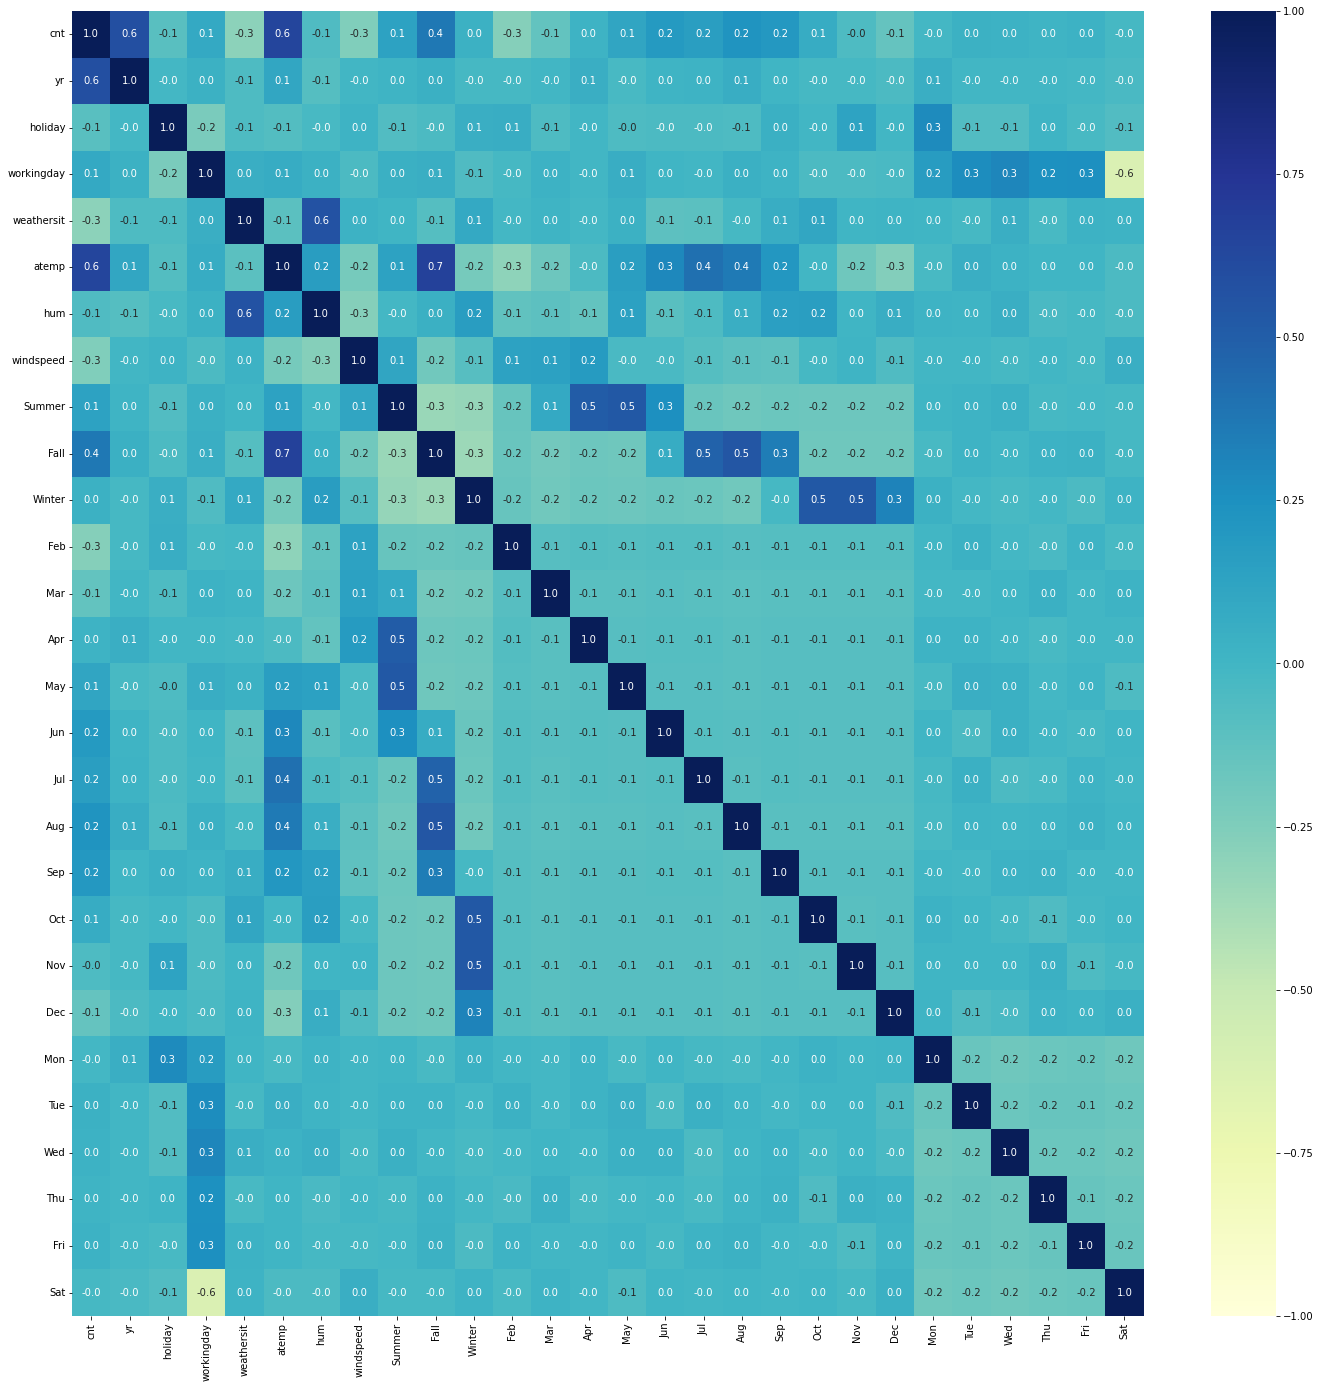

In [18]:
# checking correaltions

plt.figure(figsize = (24, 24))
sns.heatmap(df_train.corr(), vmin=-1.0, vmax=1.0, annot=True, fmt='.1f', cmap="YlGnBu")
plt.show()

### Rescaling features

In [19]:
scaler = MinMaxScaler()

num_vars = ['weathersit', 'atemp', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

### Dividing into X and y sets for the model building

In [20]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

In [21]:
# Add a constant
X_train_lm = sm.add_constant(X_train)
X_train_lm.head()

,const,yr,holiday,workingday,weathersit,atemp,hum,windspeed,Summer,Fall,...,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat
instant,,,,,,,,,,,,,,,,,,,,,
654,1.0,1,0,1,0.0,0.501133,0.575354,0.300794,0,0,...,0,1,0,0,0,1,0,0,0,0
577,1.0,1,0,1,0.0,0.766351,0.725633,0.264686,0,1,...,0,0,0,0,0,1,0,0,0,0
427,1.0,1,0,0,0.5,0.438975,0.640189,0.255342,0,0,...,0,0,0,0,0,0,0,0,0,1
729,1.0,1,0,0,0.0,0.200348,0.498067,0.663106,0,0,...,0,0,0,1,0,0,0,0,0,0
483,1.0,1,0,0,0.5,0.391735,0.504508,0.188475,1,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
X_train_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 654 to 80
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       510 non-null    float64
 1   yr          510 non-null    int64  
 2   holiday     510 non-null    int64  
 3   workingday  510 non-null    int64  
 4   weathersit  510 non-null    float64
 5   atemp       510 non-null    float64
 6   hum         510 non-null    float64
 7   windspeed   510 non-null    float64
 8   Summer      510 non-null    uint8  
 9   Fall        510 non-null    uint8  
 10  Winter      510 non-null    uint8  
 11  Feb         510 non-null    uint8  
 12  Mar         510 non-null    uint8  
 13  Apr         510 non-null    uint8  
 14  May         510 non-null    uint8  
 15  Jun         510 non-null    uint8  
 16  Jul         510 non-null    uint8  
 17  Aug         510 non-null    uint8  
 18  Sep         510 non-null    uint8  
 19  Oct         510 non-null    

In [23]:
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     100.7
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          1.28e-176
Time:                        02:12:05   Log-Likelihood:                -4113.0
No. Observations:                 510   AIC:                             8280.
Df Residuals:                     483   BIC:                             8394.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1602.8526    271.429      5.905      0.0

In [24]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/silenthill/.miniconda/envs/ml/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
2,holiday,inf
3,workingday,inf
26,Fri,inf
25,Thu,inf
24,Wed,inf
23,Tue,inf
22,Mon,inf
0,const,60.09
9,Fall,11.29
17,Aug,9.26


## Step 6: Iterate until acceptable p-values and VIF

### Iteration 1

In [25]:
# Removing Thu (high p-value, high VIF)
dropped_columns = ['Thu']

X_train_lm.drop(['Thu'], axis=1, inplace=True)
print(X_train_lm.columns)

lr = sm.OLS(y_train, X_train_lm).fit()
print()
print(lr.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

print()
vif

Index(['const', 'yr', 'holiday', 'workingday', 'weathersit', 'atemp', 'hum',
       'windspeed', 'Summer', 'Fall', 'Winter', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Mon', 'Tue', 'Wed',
       'Fri', 'Sat'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     100.7
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          1.28e-176
Time:                        02:12:05   Log-Likelihood:                -4113.0
No. Observations:                 510   AIC:                             8280.
Df Residuals:                     483   BIC:                             8394.
Df Model:                          26                                         
Covariance Typ

,Features,VIF
0,const,60.09
9,Fall,11.29
17,Aug,9.26
16,Jul,8.40
10,Winter,8.20
8,Summer,6.71
18,Sep,6.51
15,Jun,6.34
14,May,6.28
19,Oct,5.98


### Iteration 2

In [26]:
# Removing Nov (high p-value, high VIF)
dropped_columns.append('Nov')

X_train_lm.drop(['Nov'], axis=1, inplace=True)
print(X_train_lm.columns)

lr = sm.OLS(y_train, X_train_lm).fit()
print()
print(lr.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

print()
vif

Index(['const', 'yr', 'holiday', 'workingday', 'weathersit', 'atemp', 'hum',
       'windspeed', 'Summer', 'Fall', 'Winter', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Dec', 'Mon', 'Tue', 'Wed', 'Fri',
       'Sat'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     104.9
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          1.50e-177
Time:                        02:12:05   Log-Likelihood:                -4113.2
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     484   BIC:                             8389.
Df Model:                          25                                         
Covariance Type:     

,Features,VIF
0,const,59.36
9,Fall,9.66
17,Aug,6.76
8,Summer,6.37
16,Jul,6.24
5,atemp,5.73
14,May,5.29
15,Jun,5.01
13,Apr,4.41
18,Sep,4.11


### Iteration 3

In [27]:
# Removing Jul (high p-value, high VIF)
dropped_columns.append('Jul')

X_train_lm.drop(['Jul'], axis=1, inplace=True)
print(X_train_lm.columns)

lr = sm.OLS(y_train, X_train_lm).fit()
print()
print(lr.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

print()
vif

Index(['const', 'yr', 'holiday', 'workingday', 'weathersit', 'atemp', 'hum',
       'windspeed', 'Summer', 'Fall', 'Winter', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Aug', 'Sep', 'Oct', 'Dec', 'Mon', 'Tue', 'Wed', 'Fri', 'Sat'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     109.3
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          2.15e-178
Time:                        02:12:06   Log-Likelihood:                -4113.7
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     485   BIC:                             8383.
Df Model:                          24                                         
Covariance Type:            nonrobu

,Features,VIF
0,const,59.35
9,Fall,6.70
8,Summer,5.69
5,atemp,4.06
14,May,3.52
3,workingday,3.24
13,Apr,3.22
10,Winter,3.10
15,Jun,2.29
6,hum,2.01


### Iteration 4

In [28]:
# Removing Dec (high p-value, low VIF)
dropped_columns.append('Dec')

X_train_lm.drop(['Dec'], axis=1, inplace=True)
print(X_train_lm.columns)

lr = sm.OLS(y_train, X_train_lm).fit()
print()
print(lr.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

print()
vif

Index(['const', 'yr', 'holiday', 'workingday', 'weathersit', 'atemp', 'hum',
       'windspeed', 'Summer', 'Fall', 'Winter', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Aug', 'Sep', 'Oct', 'Mon', 'Tue', 'Wed', 'Fri', 'Sat'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     114.2
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          1.99e-179
Time:                        02:12:06   Log-Likelihood:                -4113.7
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     486   BIC:                             8377.
Df Model:                          23                                         
Covariance Type:            nonrobust     

,Features,VIF
0,const,58.93
9,Fall,6.69
8,Summer,5.69
5,atemp,4.03
14,May,3.50
3,workingday,3.24
13,Apr,3.20
10,Winter,2.98
15,Jun,2.28
6,hum,1.99


### Iteration 5

In [29]:
# Removing Tue (high p-value, low VIF)
dropped_columns.append('Tue')

X_train_lm.drop(['Tue'], axis=1, inplace=True)
print(X_train_lm.columns)

lr = sm.OLS(y_train, X_train_lm).fit()
print()
print(lr.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

print()
vif

Index(['const', 'yr', 'holiday', 'workingday', 'weathersit', 'atemp', 'hum',
       'windspeed', 'Summer', 'Fall', 'Winter', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Aug', 'Sep', 'Oct', 'Mon', 'Wed', 'Fri', 'Sat'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     119.7
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          1.87e-180
Time:                        02:12:06   Log-Likelihood:                -4113.7
No. Observations:                 510   AIC:                             8273.
Df Residuals:                     487   BIC:                             8371.
Df Model:                          22                                         
Covariance Type:            nonrobust            

,Features,VIF
0,const,58.82
9,Fall,6.69
8,Summer,5.69
5,atemp,4.03
14,May,3.50
13,Apr,3.20
10,Winter,2.98
3,workingday,2.39
15,Jun,2.28
6,hum,1.99


### Iteration 6

In [30]:
# Removing Mon (high p-value, low VIF)
dropped_columns.append('Mon')

X_train_lm.drop(['Mon'], axis=1, inplace=True)
print(X_train_lm.columns)

lr = sm.OLS(y_train, X_train_lm).fit()
print()
print(lr.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

print()
vif

Index(['const', 'yr', 'holiday', 'workingday', 'weathersit', 'atemp', 'hum',
       'windspeed', 'Summer', 'Fall', 'Winter', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Aug', 'Sep', 'Oct', 'Wed', 'Fri', 'Sat'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     125.5
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          1.92e-181
Time:                        02:12:06   Log-Likelihood:                -4113.9
No. Observations:                 510   AIC:                             8272.
Df Residuals:                     488   BIC:                             8365.
Df Model:                          21                                         
Covariance Type:            nonrobust                   

,Features,VIF
0,const,58.79
9,Fall,6.69
8,Summer,5.68
5,atemp,4.02
14,May,3.50
13,Apr,3.20
10,Winter,2.98
15,Jun,2.28
3,workingday,2.11
6,hum,1.99


### Iteration 7

In [31]:
# Removing Wed (high p-value, low VIF)
dropped_columns.append('Wed')

X_train_lm.drop(['Wed'], axis=1, inplace=True)
print(X_train_lm.columns)

lr = sm.OLS(y_train, X_train_lm).fit()
print()
print(lr.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

print()
vif

Index(['const', 'yr', 'holiday', 'workingday', 'weathersit', 'atemp', 'hum',
       'windspeed', 'Summer', 'Fall', 'Winter', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Aug', 'Sep', 'Oct', 'Fri', 'Sat'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     131.9
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          2.30e-182
Time:                        02:12:06   Log-Likelihood:                -4114.2
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     489   BIC:                             8359.
Df Model:                          20                                         
Covariance Type:            nonrobust                          

,Features,VIF
0,const,58.79
9,Fall,6.68
8,Summer,5.68
5,atemp,4.02
14,May,3.50
13,Apr,3.20
10,Winter,2.98
15,Jun,2.28
6,hum,1.99
3,workingday,1.96


### Iteration 8

In [32]:
# Removing Feb (high p-value, low VIF)
dropped_columns.append('Feb')

X_train_lm.drop(['Feb'], axis=1, inplace=True)
print(X_train_lm.columns)

lr = sm.OLS(y_train, X_train_lm).fit()
print()
print(lr.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

print()
vif

Index(['const', 'yr', 'holiday', 'workingday', 'weathersit', 'atemp', 'hum',
       'windspeed', 'Summer', 'Fall', 'Winter', 'Mar', 'Apr', 'May', 'Jun',
       'Aug', 'Sep', 'Oct', 'Fri', 'Sat'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     138.7
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          3.39e-183
Time:                        02:12:06   Log-Likelihood:                -4114.8
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     490   BIC:                             8354.
Df Model:                          19                                         
Covariance Type:            nonrobust                                 

,Features,VIF
0,const,55.45
9,Fall,6.13
8,Summer,5.60
5,atemp,4.01
13,May,3.40
12,Apr,3.10
10,Winter,2.45
14,Jun,2.23
6,hum,1.98
3,workingday,1.96


### Iteration 9

In [33]:
# Removing Apr (high p-value, low VIF)
dropped_columns.append('Apr')

X_train_lm.drop(['Apr'], axis=1, inplace=True)
print(X_train_lm.columns)

lr = sm.OLS(y_train, X_train_lm).fit()
print()
print(lr.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

print()
vif

Index(['const', 'yr', 'holiday', 'workingday', 'weathersit', 'atemp', 'hum',
       'windspeed', 'Summer', 'Fall', 'Winter', 'Mar', 'May', 'Jun', 'Aug',
       'Sep', 'Oct', 'Fri', 'Sat'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     145.8
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          9.21e-184
Time:                        02:12:06   Log-Likelihood:                -4116.1
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     491   BIC:                             8351.
Df Model:                          18                                         
Covariance Type:            nonrobust                                        

,Features,VIF
0,const,55.12
9,Fall,6.13
5,atemp,3.98
8,Summer,2.84
10,Winter,2.41
6,hum,1.96
3,workingday,1.96
12,May,1.81
18,Sat,1.79
14,Aug,1.77


### Iteration 10

In [34]:
# Removing Fall (low p-value, high VIF) results in Adj. R-squared: 0.834
# Removing Jun (high p-value, low VIF )
dropped_columns.append('Jun')

X_train_lm.drop(['Jun'], axis=1, inplace=True)
print(X_train_lm.columns)

lr = sm.OLS(y_train, X_train_lm).fit()
print()
print(lr.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

print()
vif

Index(['const', 'yr', 'holiday', 'workingday', 'weathersit', 'atemp', 'hum',
       'windspeed', 'Summer', 'Fall', 'Winter', 'Mar', 'May', 'Aug', 'Sep',
       'Oct', 'Fri', 'Sat'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     153.8
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          2.55e-184
Time:                        02:12:07   Log-Likelihood:                -4117.4
No. Observations:                 510   AIC:                             8271.
Df Residuals:                     492   BIC:                             8347.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
     

,Features,VIF
0,const,55.12
9,Fall,6.05
5,atemp,3.52
8,Summer,2.78
10,Winter,2.37
3,workingday,1.96
6,hum,1.95
17,Sat,1.79
4,weathersit,1.69
13,Aug,1.68


### Iteration 11

In [35]:
# Removing holiday (high p-value, low VIF)
dropped_columns.append('holiday')

X_train_lm.drop(['holiday'], axis=1, inplace=True)
print(X_train_lm.columns)

lr = sm.OLS(y_train, X_train_lm).fit()
print()
print(lr.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

print()
vif

Index(['const', 'yr', 'workingday', 'weathersit', 'atemp', 'hum', 'windspeed',
       'Summer', 'Fall', 'Winter', 'Mar', 'May', 'Aug', 'Sep', 'Oct', 'Fri',
       'Sat'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     162.5
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          9.43e-185
Time:                        02:12:07   Log-Likelihood:                -4119.0
No. Observations:                 510   AIC:                             8272.
Df Residuals:                     493   BIC:                             8344.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                

,Features,VIF
0,const,53.65
8,Fall,6.04
4,atemp,3.52
7,Summer,2.78
9,Winter,2.37
5,hum,1.95
2,workingday,1.72
3,weathersit,1.69
12,Aug,1.68
16,Sat,1.65


### Iteration 12

In [36]:
# Removing Fri (high p-value, low VIF)
dropped_columns.append('Fri')

X_train_lm.drop(['Fri'], axis=1, inplace=True)
print(X_train_lm.columns)

lr = sm.OLS(y_train, X_train_lm).fit()
print()
print(lr.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

print()
vif

Index(['const', 'yr', 'workingday', 'weathersit', 'atemp', 'hum', 'windspeed',
       'Summer', 'Fall', 'Winter', 'Mar', 'May', 'Aug', 'Sep', 'Oct', 'Sat'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.3
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          3.46e-185
Time:                        02:12:07   Log-Likelihood:                -4120.7
No. Observations:                 510   AIC:                             8273.
Df Residuals:                     494   BIC:                             8341.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std e

,Features,VIF
0,const,53.46
8,Fall,6.04
4,atemp,3.52
7,Summer,2.78
9,Winter,2.37
5,hum,1.95
3,weathersit,1.69
12,Aug,1.68
2,workingday,1.66
15,Sat,1.65


### Iteration 13

In [37]:
# Removing Fall (low p-value, high VIF)
dropped_columns.append('Fall')

X_train_lm.drop(['Fall'], axis=1, inplace=True)
print(X_train_lm.columns)

lr = sm.OLS(y_train, X_train_lm).fit()
print()
print(lr.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

print()
vif

Index(['const', 'yr', 'workingday', 'weathersit', 'atemp', 'hum', 'windspeed',
       'Summer', 'Winter', 'Mar', 'May', 'Aug', 'Sep', 'Oct', 'Sat'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          8.78e-185
Time:                        02:12:07   Log-Likelihood:                -4124.3
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     495   BIC:                             8342.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err      

,Features,VIF
0,const,53.45
5,hum,1.92
8,Winter,1.78
7,Summer,1.75
3,weathersit,1.67
2,workingday,1.66
14,Sat,1.65
4,atemp,1.59
10,May,1.51
13,Oct,1.49


### Iteration 14

In [38]:
# Removing Mar (high p-value, low VIF)
dropped_columns.append('Mar')

X_train_lm.drop(['Mar'], axis=1, inplace=True)
print(X_train_lm.columns)

lr = sm.OLS(y_train, X_train_lm).fit()
print()
print(lr.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

print()
vif

Index(['const', 'yr', 'workingday', 'weathersit', 'atemp', 'hum', 'windspeed',
       'Summer', 'Winter', 'May', 'Aug', 'Sep', 'Oct', 'Sat'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.3
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          1.71e-185
Time:                        02:12:07   Log-Likelihood:                -4125.4
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     496   BIC:                             8338.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t  

,Features,VIF
0,const,53.02
5,hum,1.92
7,Summer,1.74
8,Winter,1.71
3,weathersit,1.67
2,workingday,1.65
13,Sat,1.65
4,atemp,1.56
9,May,1.48
12,Oct,1.48


### Iteration 15

In [39]:
# Removing May (high p-value, low VIF)
dropped_columns.append('May')

X_train_lm.drop(['May'], axis=1, inplace=True)
print(X_train_lm.columns)

lr = sm.OLS(y_train, X_train_lm).fit()
print()
print(lr.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

print()
vif

Index(['const', 'yr', 'workingday', 'weathersit', 'atemp', 'hum', 'windspeed',
       'Summer', 'Winter', 'Aug', 'Sep', 'Oct', 'Sat'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.8
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          3.51e-186
Time:                        02:12:07   Log-Likelihood:                -4126.5
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     497   BIC:                             8334.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|

,Features,VIF
0,const,52.11
5,hum,1.87
8,Winter,1.70
3,weathersit,1.67
2,workingday,1.65
12,Sat,1.65
4,atemp,1.55
11,Oct,1.48
9,Aug,1.42
7,Summer,1.38


## Step 7: Residual Analysis of the train data

<Figure size 432x288 with 0 Axes>

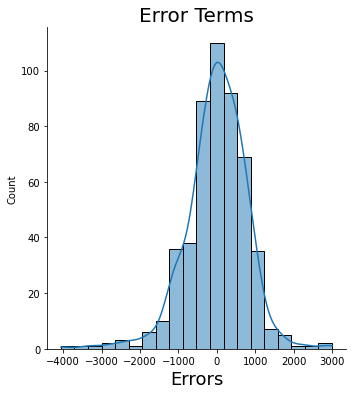

In [40]:
y_train_pred = lr.predict(X_train_lm)

fig = plt.figure()

sns.displot((y_train - y_train_pred), bins = 20, kde=True)

plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

## Step 8: Making Predictions Using the Final Model

### Rescale without fitting

In [41]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,cnt,yr,holiday,workingday,weathersit,atemp,hum,windspeed,Summer,Fall,...,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,4546.981735,0.479452,0.036530,0.698630,0.187215,0.532991,0.638508,0.313350,0.264840,0.246575,...,0.086758,0.082192,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721
std,1898.633630,0.500722,0.188034,0.459904,0.269422,0.217888,0.148974,0.159947,0.442259,0.432005,...,0.282125,0.275286,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202
min,441.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3303.500000,0.000000,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4579.000000,0.000000,0.000000,1.000000,0.000000,0.549198,0.627737,0.299459,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5869.500000,1.000000,0.000000,1.000000,0.500000,0.714132,0.743928,0.403048,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8395.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and y sets for the model building

In [42]:
y_test = df_test.pop('cnt')
X_test = df_test

### Drop columns

In [43]:
X_test_ml = sm.add_constant(X_test)
X_test_ml.drop(dropped_columns, axis=1, inplace=True)
X_test_ml.head()

,const,yr,workingday,weathersit,atemp,hum,windspeed,Summer,Winter,Aug,Sep,Oct,Sat
instant,,,,,,,,,,,,,
185,1.0,0,0,0.5,0.769660,0.657364,0.084219,0,0,0,0,0,0
536,1.0,1,1,0.0,0.842587,0.610133,0.153728,1,0,0,0,0,0
300,1.0,0,1,0.5,0.496145,0.837699,0.334206,0,1,0,0,1,0
222,1.0,0,1,0.0,0.795343,0.437098,0.339570,0,0,1,0,0,0
153,1.0,0,1,0.0,0.741471,0.314298,0.537414,1,0,0,0,0,0


### Predict test values

<Figure size 432x288 with 0 Axes>

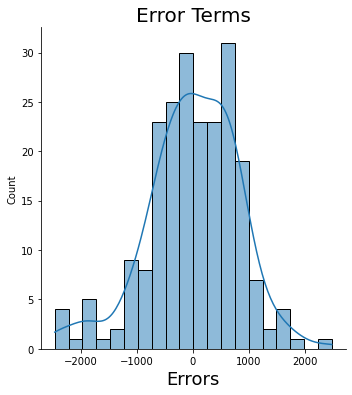

In [44]:
y_test_pred = lr.predict(X_test_ml)

fig = plt.figure()

sns.displot((y_test - y_test_pred), bins = 20, kde=True)

plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

## Step 9: Model evaluation

Text(0, 0.5, 'y_pred')

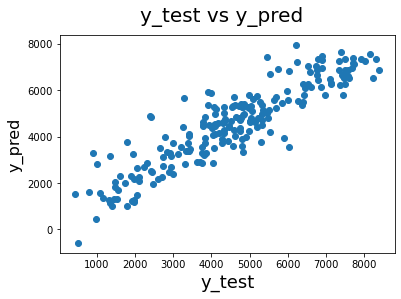

In [45]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

### Residual analysis

### r2_score

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8138311095452997

### Coefficients

In [47]:
lr.params.sort_values()

windspeed    -1544.384671
hum          -1403.086927
weathersit   -1376.233238
Oct            320.096272
workingday     449.627485
Sat            521.236160
Aug            645.878633
Summer         912.507691
Winter        1100.642520
Sep           1117.488246
const         1652.978496
yr            2015.127022
atemp         4741.623068
dtype: float64

In [48]:
lr.params.abs().sort_values()

Oct            320.096272
workingday     449.627485
Sat            521.236160
Aug            645.878633
Summer         912.507691
Winter        1100.642520
Sep           1117.488246
weathersit    1376.233238
hum           1403.086927
windspeed     1544.384671
const         1652.978496
yr            2015.127022
atemp         4741.623068
dtype: float64